In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm
import koreanize_matplotlib

# 폰트 경로 확인 및 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 폰트 경로
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 한글 깨짐 방지 - 마이너스 기호 처리
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os

# 서비스 계정 키 경로 설정
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/eunyu/sprintda05-eunyu-a9946f7dea9c.json"

# GCS의 Parquet 파일 경로
gcs_path = 'gs://final_project_enuyu/data/final_project/votes/accounts_group.parquet'

# 데이터 불러오기
group_df = pd.read_parquet(gcs_path, engine='pyarrow')
group_df

,id,grade,class_num,school_id
0,1,1,1,1
1,8,3,2,1
2,9,3,3,1
3,10,2,2,1
4,11,2,3,1
...,...,...,...,...
84510,84542,3,2,5107
84511,84543,2,7,3487
84512,84544,3,1,5043
84513,84545,2,7,416


In [21]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84515 entries, 0 to 84514
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         84515 non-null  int64
 1   grade      84515 non-null  int64
 2   class_num  84515 non-null  int64
 3   school_id  84515 non-null  int64
dtypes: int64(4)
memory usage: 2.6 MB


In [3]:
group_df.dtypes

id           int64
grade        int64
class_num    int64
school_id    int64
dtype: object

In [4]:
group_df.isnull().sum()

id           0
grade        0
class_num    0
school_id    0
dtype: int64

In [5]:
group_df.describe(include='all')

,id,grade,class_num,school_id
count,84515.000000,84515.000000,84515.000000,84515.000000
mean,42279.376087,2.113992,5.318606,3079.496468
std,24400.962630,0.754896,4.089901,1675.036093
min,1.000000,1.000000,0.000000,1.000000
25%,21147.500000,2.000000,2.000000,1752.000000
50%,42279.000000,2.000000,4.000000,3023.000000
75%,63411.500000,3.000000,7.000000,4620.000000
max,84546.000000,20.000000,41.000000,5965.000000


### 이상치

In [23]:
# 0반
out_class_zero = group_df[group_df['class_num'] == 0]

# 20학년
out_grade_20 = group_df[group_df['grade'] == 20]

# 30반 초과
out_class_over_30 = group_df[group_df['class_num'] > 30]

# 이상치 통합 확인 (중복 제거 포함)
outliers_combined = pd.concat([out_class_zero, out_grade_20, out_class_over_30]).drop_duplicates()
outliers_combined

,id,grade,class_num,school_id
62234,62259,2,0,4348
62626,62651,2,0,1820
61622,61647,20,7,3867
70368,70394,1,41,736


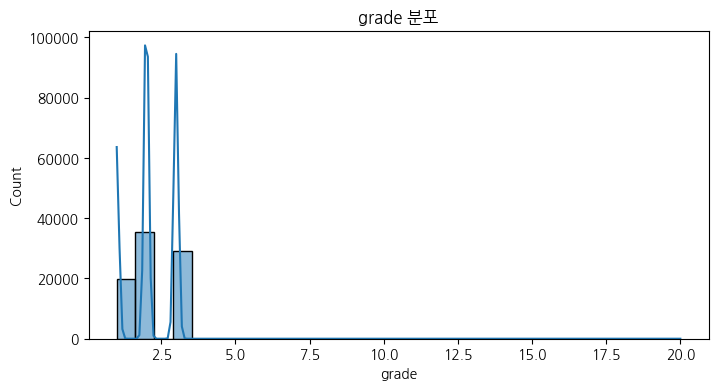

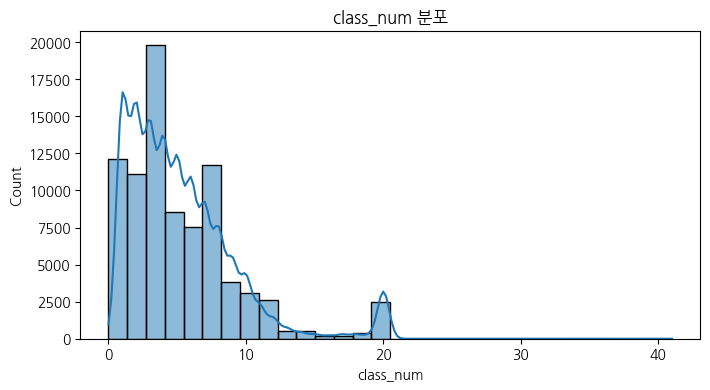

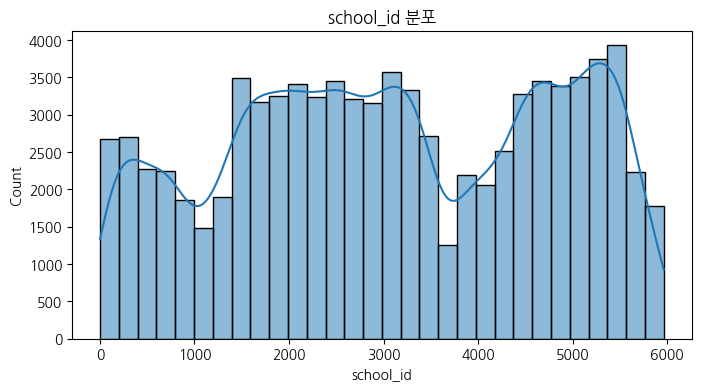

In [6]:

cols = ['grade', 'class_num', 'school_id']
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(group_df[col], kde=True, bins=30)
    plt.title(f'{col} 분포')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [7]:
# grade가 13 이상인 데이터
group_df[group_df['grade'] > 12]

# class_num == 0인 데이터
group_df[group_df['class_num'] == 0]

,id,grade,class_num,school_id
62234,62259,2,0,4348
62626,62651,2,0,1820


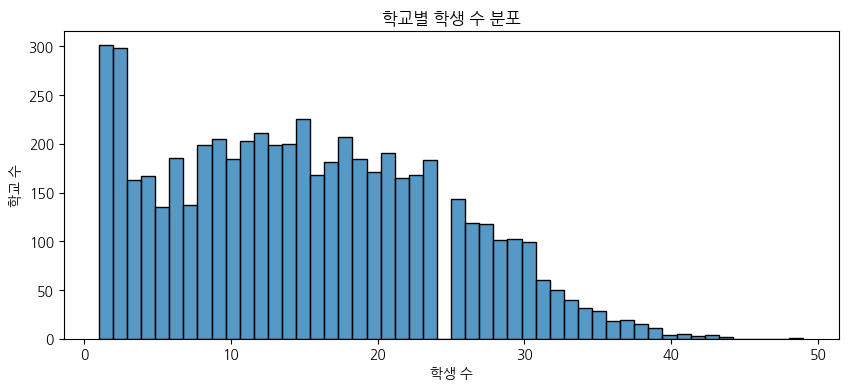

school_id
3283    49
1773    44
1492    44
2212    43
271     43
Name: count, dtype: int64

In [10]:
# 학교별 학생 수
school_counts = group_df['school_id'].value_counts()

plt.figure(figsize=(10, 4))
sns.histplot(school_counts, bins=50)
plt.title("학교별 학생 수 분포")
plt.xlabel("학생 수")
plt.ylabel("학교 수")
plt.show()

school_counts.head()


- 대다수의 학교는 학생 수가 5~25명 수준.
- 0~5명인 소규모 학교도 많음.
- school_id=3283은 49명으로 최다 학생 수를 보유한 학교

In [24]:
# 전체 열 기준 완전 중복 행 확인
duplicate_rows = group_df[group_df.duplicated(keep=False)]
print(f"완전 동일한 중복 행 수: {len(duplicate_rows)}")
duplicate_rows.head()

완전 동일한 중복 행 수: 0


,id,grade,class_num,school_id
